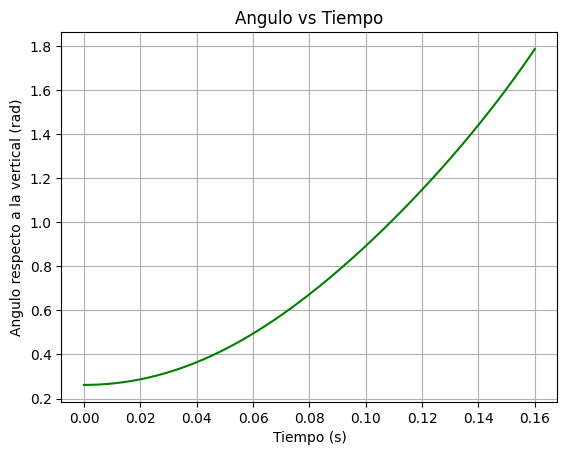

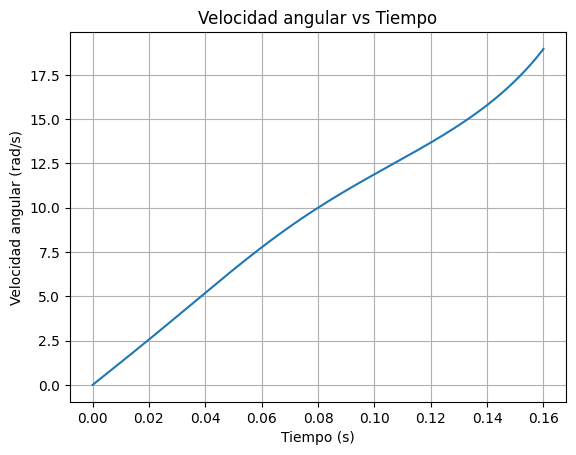

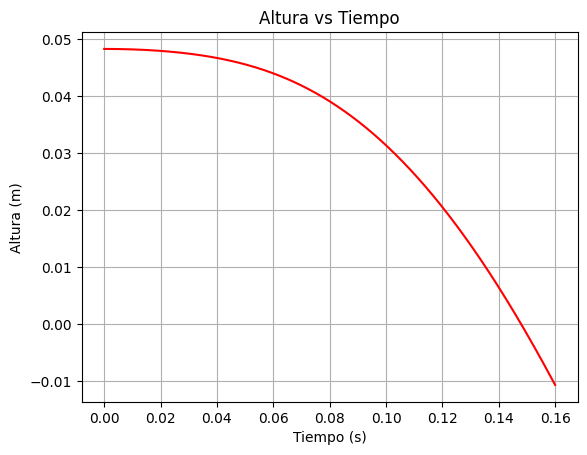

In [270]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def si(A,t,l,g):
  th=A[0]
  w=A[1]
  dth=w
  dw=(np.sin(th)*2*g/l-w**2*np.cos(th)*np.sin(th))/(1/3 + np.sin(th)**2)
  return np.array([dth,dw])
#Parametros
g=9.81
L=0.1
A0=np.array([np.pi/12,0])
t = np.linspace(0,0.16, 10000)
edosol=odeint(si,A0,t,args=(L,g))
th=edosol[:,0]
w=edosol[:,1]
y=L*np.cos(th)/2

plt.plot(t,th,"g")
plt.xlabel('Tiempo (s)')
plt.ylabel('Angulo respecto a la vertical (rad)')
plt.title('Angulo vs Tiempo')
plt.grid()
plt.show()

plt.plot(t,w)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Velocidad angular vs Tiempo')
plt.grid()
plt.show()

plt.plot(t,y,"r")
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Altura vs Tiempo')
plt.grid()
plt.show()

Basandonos en la grafica de  y vs tiempo, el tiempo hasta el cual es correcto tomar en cuenta los datos es aproximadamente 0.16, para una respuesta mas exacta se calcularan el tiempo en el que el lapiz cae


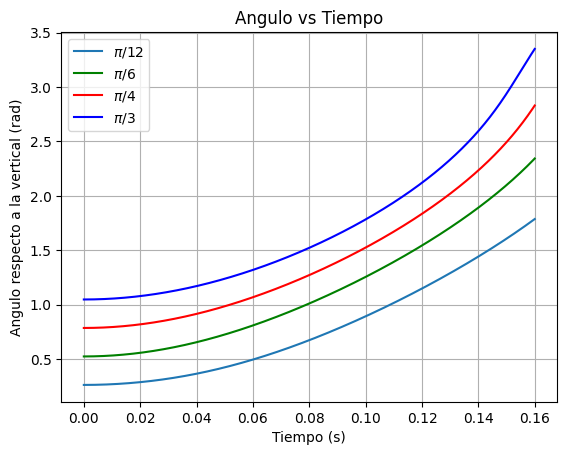

In [271]:
#angulos
a1=np.array([np.pi/6,0])
a2=np.array([np.pi/4,0])
a3=np.array([np.pi/3,0])
edosol1=odeint(si,a1,t,args=(L,g))
edosol2=odeint(si,a2,t,args=(L,g))
edosol3=odeint(si,a3,t,args=(L,g))
plt.plot(t,th,label='$\pi/12$')
plt.plot(t,edosol1[:,0],"g",label='$\pi/6$')
plt.plot(t,edosol2[:,0],"r",label='$\pi/4$')
plt.plot(t,edosol3[:,0],"b",label='$\pi/3$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Angulo respecto a la vertical (rad)')
plt.title('Angulo vs Tiempo')
plt.grid()
plt.legend()

In [272]:
from scipy import interpolate
from scipy.optimize import fsolve
pi_doce=interpolate.CubicSpline(t,edosol[:,0])
pi_6=interpolate.CubicSpline(t,edosol1[:,0])
pi_4=interpolate.CubicSpline(t,edosol2[:,0])
pi_3=interpolate.CubicSpline(t,edosol3[:,0])

def l0(t):
  return pi_doce(t)- np.pi/2
t0=fsolve(l0,0.1)
def l1(t):
  return pi_6(t)- np.pi/2
t1=fsolve(l1,0.1)

def l2(t):
  return pi_4(t)- np.pi/2
t2=fsolve(l2,0.1)

def l3(t):
  return pi_3(t)- np.pi/2
t3=fsolve(l3,0.1)

print(f"Los tiempos de caida de los angulos pi/12,6,4,3 son respectivamente {t0,t1,t2,t3}")


Los tiempos de caida de los angulos pi/12,6,4,3 son respectivamente (array([0.14790779]), array([0.12171669]), array([0.10326857]), array([0.08411714]))


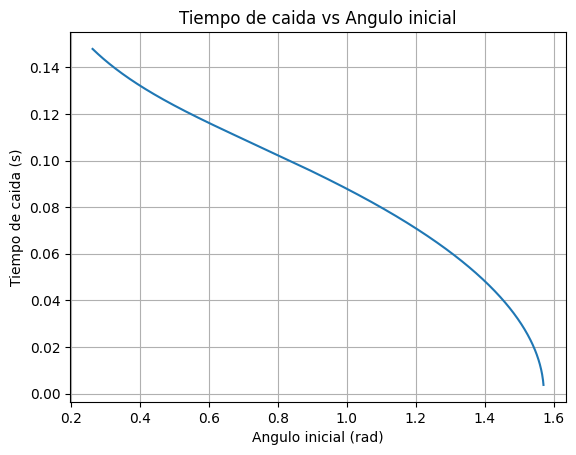

In [273]:
from scipy.integrate import quad
C=np.sqrt(L/g)/2
x0=np.pi/12
g=9.81
L=0.1
ang=np.linspace(np.pi/12,np.pi/2,1000)
y=[]
for i in ang:
  G=lambda x: np.sqrt((1/3+ np.sin(x)**2) /(np.cos(i)-np.cos(x)))*C
  y.append(quad(G,i,np.pi/2 +0.001)[0]) #Se coloca el +0.001 para evitar errores en la integracion

plt.plot(ang,y)
plt.xlabel('Angulo inicial (rad)')
plt.ylabel('Tiempo de caida (s)')
plt.title('Tiempo de caida vs Angulo inicial')
plt.grid()
plt.show()

In [274]:
#Comparando las soluciones de raices y la integral
valores_int=[]
for i in [np.pi/12,np.pi/6,np.pi/4,np.pi/3]:
  Pr=lambda x: np.sqrt((1/3+ np.sin(x)**2) /(np.cos(i)-np.cos(x)))*C
  valores_int.append(quad(Pr,i,np.pi/2 +0.001)[0])
print(valores_int, " valores encontrados resolviendo la integral")
print(f"\n{t0,t1,t2,t3} valores encontrados por metodos de raices" )

#Los valores difieren a partir de la quinta cifra decimal

[0.14796708685775356, 0.12177931050458518, 0.10333786613781554, 0.08419953981335558]  valores encontrados resolviendo la integral

(array([0.14790779]), array([0.12171669]), array([0.10326857]), array([0.08411714])) valores encontrados por metodos de raices


In [281]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

b=sp.Symbol("λ")
a=sp.Symbol("a")
A=sp.Matrix([[sp.cos(a), -sp.sin(a)], [sp.sin(a), sp.cos(a)]])
S=A-sp.eye(2)*b

Poli_caracteristico= S.det()
Poli_caracteristico.simplify()

valores=A.eigenvals()

D=sp.diag(*valores)
A.eigenvects() #Se utiliza la función, por simplicidad debido a que esta devuelve mas que solo los vectores propios, simplente fueron extraidos de la función

v0=sp.Matrix([[sp.sin(a)/sp.sqrt(sp.cos(a)**2 - 1),-sp.sin(a)/sp.sqrt(sp.cos(a)**2 - 1)],[1,1]]) # Matriz de vectores propios
v0inv=v0.inv()

N=v0*D*v0inv
N.simplify()


print(f"El polinomio caracteristico es ")
display(Poli_caracteristico)

print(f"\nLos valores propios son ")
display(valores)

print(f"\nLa matriz diagonal es ")
display(D)

print(f"\nLa matriz de vectores proipos es ")
display(v0)

print(f"\nComprobación ")
display(N)

El polinomio caracteristico es 


 2                   2         2   
λ  - 2⋅λ⋅cos(a) + sin (a) + cos (a)


Los valores propios son 


⎧    ___________________________                ___________________________            ⎫
⎨- ╲╱ (cos(a) - 1)⋅(cos(a) + 1)  + cos(a): 1, ╲╱ (cos(a) - 1)⋅(cos(a) + 1)  + cos(a): 1⎬
⎩                                                                                      ⎭


La matriz diagonal es 


⎡    ___________________________                                                 ⎤
⎢- ╲╱ (cos(a) - 1)⋅(cos(a) + 1)  + cos(a)                    0                   ⎥
⎢                                                                                ⎥
⎢                                            ___________________________         ⎥
⎣                   0                      ╲╱ (cos(a) - 1)⋅(cos(a) + 1)  + cos(a)⎦


La matriz de vectores proipos es 


⎡     sin(a)           -sin(a)     ⎤
⎢────────────────  ────────────────⎥
⎢   _____________     _____________⎥
⎢  ╱    2            ╱    2        ⎥
⎢╲╱  cos (a) - 1   ╲╱  cos (a) - 1 ⎥
⎢                                  ⎥
⎣       1                 1        ⎦


Comprobación 


⎡cos(a)  -sin(a)⎤
⎢               ⎥
⎣sin(a)  cos(a) ⎦

In [266]:
A

⎡cos(a)  -sin(a)⎤
⎢               ⎥
⎣sin(a)  cos(a) ⎦

In [267]:
#Calculo de valores y vectores, los resultados son complejos puesto que cos(pi/4)<1 por tanto la raiz es negativa

si=A.subs({a:np.pi/4})
Areal = sp.matrix2numpy(si,dtype=float)
Valores, Vectores=np.linalg.eig(Areal,)
print(f"los valores propios son {Valores}")
print(f"\nlos vectores propios son {Vectores}")

los valores propios son [0.70710678+0.70710678j 0.70710678-0.70710678j]

los vectores propios son [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]
